## Plot approximate solutions for the SDOF problem

In [1]:
import sys
sys.path.append('../')

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('classic')

from functions.BernsteinPols import BP, dBP
from functions.construct_B import construct_B
from functions.iteration import SDOF_integration
from functions.make_solution import get_displacement, get_speed, get_acceleration, get_solution
from functions.indefinite_integral import indefinite_integral

Define parameters for the SDOF system

In [2]:
m   = 1                  # the mass, >0
c   = 0.1                # the damping coefficient, >= 0
k   = 1                  # the stiffness coefficient, >0
x0  = 0.1                # the initial displacement
dx0 = -0.1               # the initial speed
def force(t):            # the excitation function
	# return 0
    return np.cos(t)

Define parameters for the approximation

In [3]:
p   = 5                  # p-1 is the degree of polynomial approximation, p>= 3
h   = 0.01               # the timestep, >0
l   = 1000               # the number of iterations, >0
sampling_rate = 0.0001   # the spacing of points to sample for estimating the eigenfrequency

Initialize and run the algorithm

In [4]:
c = c/m
k = k/m
def f(t):
    return force(t)/m

sdof_int = SDOF_integration(p, c, k, x0, dx0, f, h, l)
BP_coefs = sdof_int.integrator()
t_series, approx_disp, approx_sp, approx_acc = get_solution(BP_coefs, c, k, f, h, sampling_rate = sampling_rate)

Calculate and plot the error in energy conservation (TODO: use reduce in Numerical indefinite integration)

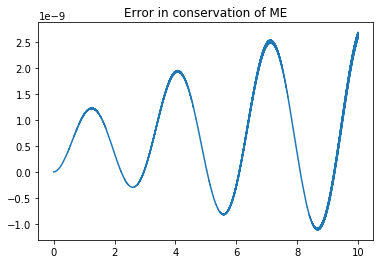

In [5]:
mech_en = (m * approx_sp **2 + k * approx_disp **2)/2

external_work = indefinite_integral(f(t_series) * approx_sp, sampling_rate)
friction_work = c* indefinite_integral(approx_sp * approx_sp, sampling_rate)

fig = plt.figure()
plt.title("Error in conservation of ME")
plt.plot(t_series,mech_en - external_work + friction_work - mech_en[0]);
plt.show()